# Gradient Boosting (Clasificación)

## 1. Librerias y configuraciones previas


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#Creación de modelo
from sklearn.ensemble import GradientBoostingClassifier


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from utils.funciones import multiple_plot, plot_roc_curve

## 3. Carga del dataset

In [3]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('./datasets/02_GermanCredit_Prep.csv')

In [4]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [5]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1138 non-null   object
 1   loan_duration_mo          1138 non-null   int64 
 2   credit_history            1138 non-null   object
 3   purpose                   1138 non-null   object
 4   loan_amount               1138 non-null   int64 
 5   savings_account_balance   1138 non-null   object
 6   time_employed_yrs         1138 non-null   object
 7   payment_pcnt_income       1138 non-null   int64 
 8   gender_status             1138 non-null   object
 9   other_signators           1138 non-null   object
 10  time_in_residence         1138 non-null   int64 
 11  property                  1138 non-null   object
 12  age_yrs                   1138 non-null   int64 
 13  other_credit_outstanding  1138 non-null   object
 14  home_ownership          

## 4. Visualización de datos

### Variables de entrada

In [7]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,car,< 100 DM,1 - 4 years,female-divorced/separated/married,co-applicant,real estate,none,own,skilled,none,yes
1,< 0 DM,current loans paid,car,< 100 DM,1 - 4 years,male-married/widowed,none,real estate,none,own,unskilled-resident,none,yes


In [8]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head(2)

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
0,12,3499,3,2,29,2,1,1
1,12,1168,4,3,27,1,1,0


In [9]:
##Visualización de frecuencia de instancias para variables categóricas
#multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [10]:
##Visualización de variables numéricas
#multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [11]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('bad_credit')

## 5. Transformación de datos

### Creación de variables Dummies 

In [12]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   loan_duration_mo                                        1138 non-null   int64
 1   loan_amount                                             1138 non-null   int64
 2   payment_pcnt_income                                     1138 non-null   int64
 3   time_in_residence                                       1138 non-null   int64
 4   age_yrs                                                 1138 non-null   int64
 5   number_loans                                            1138 non-null   int64
 6   dependents                                              1138 non-null   int64
 7   bad_credit                                              1138 non-null   int64
 8   checking_account_status_< 0 DM                          11

## 6. Creación del modelo

### Dividir el conjunto de datos

In [13]:
#Se crea una lista con todas las varibles de entrada

vDep = list(d.columns)
vDep.remove('bad_credit')

#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='bad_credit')
y = d['bad_credit']

In [14]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [15]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


In [16]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_train[num_vars].head(2)

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
9,0.0294,0.1319,0.3333,0.3333,0.1667,0.0000,0.0000
798,0.5588,0.5622,0.3333,1.0000,0.4630,0.0000,1.0000


### Creación del modelos

In [17]:
#Creación del modelo 

#Armando un simple árbol de decisión
modelGrdB = GradientBoostingClassifier(n_estimators=2
                                  , max_features = 'auto'                                  
                                  , subsample = 1
                                  , learning_rate = 0.01
                                  , random_state=123)


#Entrenamiento del modelo
modelGrdB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_features='auto',
                           n_estimators=2, random_state=123, subsample=1)

In [18]:
#Exactitud del modelo

print('Exactitud modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(modelGrdB.score(X_train, y_train), modelGrdB.score(X_test, y_test)))

Exactitud modelo inicial train/test  0.720/0.671


### Dividir el conjunto de datos

In [19]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns ='bad_credit')
y = d['bad_credit']

# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

### Escalar Variables

In [20]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


In [21]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])

X_Completo[num_vars].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
0,0.1176,0.2356,0.6667,0.3333,0.1667,0.3333,0.0000
1,0.1176,0.0619,1.0000,0.6667,0.1296,0.0000,0.0000
2,0.2941,0.1487,1.0000,0.3333,0.1667,0.0000,0.0000
3,0.0735,0.0783,1.0000,0.3333,0.1111,0.0000,0.0000
4,0.3382,0.6167,0.3333,0.3333,0.1296,0.3333,0.0000


In [22]:
# Guardar el scaler
joblib.dump(scaler, './modelos/scaler/minmaxFull_GermanCredits.pkl')

['./modelos/scaler/minmaxFull_GermanCredits.pkl']

#### Grid Search basado en validación cruzada

In [23]:
#Definicion del modelo
modelGrdB = GradientBoostingClassifier(random_state=123)


# Grid de hiperparámetros evaluados
param_grid = {'n_estimators'  : [2, 3, 5],
              'max_features'  : ['auto','sqrt', 'log2'],
              'max_depth'     : [2, 3, 5],
              'subsample'     : [0.5, 1],     # Tamaño de la muestra de datos para crear el modelo. Esto puede ayudar a reducir 
                                              # el sobreajuste y mejorar la generalización del modelo, especialmente
                                              # en conjuntos de datos grandes.
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# definicion de la variable con el número de pliegues
CV = 10

# las metricas sobre las se evaluará el modelo
scoring = 'f1'

# Búsqueda por grid search con validación cruzada
grid_GrdB = GridSearchCV(
        estimator  = modelGrdB,
        param_grid = param_grid,
        scoring    = scoring,
        n_jobs     = - 1,
        cv         = 10, 
        verbose    = 0,
        return_train_score = True
       )

grid_GrdB.fit(X_Completo, y_Completo)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 3, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 3, 5], 'subsample': [0.5, 1]},
             return_train_score=True, scoring='f1')

In [24]:
# Resultados

resultados = pd.DataFrame(grid_GrdB.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
149,0.1000,5,auto,5,1,0.7840,0.0342,0.8393,0.0125
148,0.1000,5,auto,5,0.5000,0.7795,0.0275,0.8375,0.0106
40,0.0010,5,auto,5,0.5000,0.7741,0.0315,0.8259,0.0096
155,0.1000,5,sqrt,5,1,0.7725,0.0203,0.8107,0.0094


In [25]:
# Obtener los resultados del grid search
results_grid_GrdB = pd.DataFrame(grid_GrdB.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_GrdB = ['param_learning_rate'] + \
                    ['param_max_depth'] + \
                    ['param_max_features'] + \
                    ['param_n_estimators'] + \
                    ['param_subsample'] + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y mostrar los resultados
results_grid_GrdB_filtered = results_grid_GrdB[columns_grid_GrdB]

# Crear la columna scoreWithStd: f1 / std
results_grid_GrdB_filtered['scoreWithStd'] = results_grid_GrdB_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_GrdB_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
results_grid_GrdB_filtered[['param_learning_rate','param_max_depth','param_max_features','param_n_estimators', 'mean_test_score', 'std_test_score', 'scoreWithStd']].head(10)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
0,0.0010,2,auto,2,0.6378,0.2141,2.9791
1,0.0010,2,auto,2,0.6436,0.2155,2.9868
2,0.0010,2,auto,3,0.6852,0.0560,12.2312
3,0.0010,2,auto,3,0.6983,0.0542,12.8823
4,0.0010,2,auto,5,0.7139,0.0306,23.3027
5,0.0010,2,auto,5,0.6995,0.0547,12.7771
6,0.0010,2,sqrt,2,0.6154,0.2091,2.9433
7,0.0010,2,sqrt,2,0.5550,0.1942,2.8572
8,0.0010,2,sqrt,3,0.6461,0.1560,4.1427
9,0.0010,2,sqrt,3,0.5562,0.1903,2.9225


In [26]:
# Top 3 de los mejores scores
results_grid_GrdB_filtered.sort_values(by='scoreWithStd', ascending=False).head(10)[
    ['param_learning_rate','param_max_depth','param_max_features','param_n_estimators'
     , 'mean_test_score', 'std_test_score', 'scoreWithStd']].head(3)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,scoreWithStd
87,0.0100,3,log2,3,0.7022,0.0122,57.6694
85,0.0100,3,log2,2,0.7053,0.0161,43.9099
155,0.1000,5,sqrt,5,0.7725,0.0203,38.0995


In [28]:
# Seleccionar el registro correspondiente al índice máximo
registro_max_scoreWithStd = results_grid_GrdB_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_learning_rate    0.0100
param_max_depth             3
param_max_features       log2
param_n_estimators          3
param_subsample             1
mean_test_score        0.7022
std_test_score         0.0122
split0_test_score      0.7031
split1_test_score      0.7059
split2_test_score      0.7154
split3_test_score      0.6949
split4_test_score      0.6818
split5_test_score      0.7097
split6_test_score      0.7231
split7_test_score      0.7077
split8_test_score      0.6929
split9_test_score      0.6875
scoreWithStd          57.6694
Name: 87, dtype: object

In [29]:
# Usar los mejores parámetros para crear el modelo
modelGrdB.set_params(learning_rate = results_grid_GrdB_filtered.loc[indice_max_scoreWithStd]['param_learning_rate']                         
                         , max_depth = results_grid_GrdB_filtered.loc[indice_max_scoreWithStd]['param_max_depth']
                         , max_features = results_grid_GrdB_filtered.loc[indice_max_scoreWithStd]['param_max_features']
                         , n_estimators = results_grid_GrdB_filtered.loc[indice_max_scoreWithStd]['param_n_estimators']                    
                    )

modelGrdB.fit(X_Completo, y_Completo)

GradientBoostingClassifier(learning_rate=0.01, max_features='log2',
                           n_estimators=3, random_state=123)

In [30]:
y_pred = modelGrdB.predict(X_Completo)

#### Evaluación del modelo

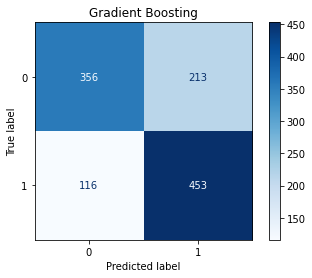

              precision    recall  f1-score   support

           0       0.75      0.63      0.68       569
           1       0.68      0.80      0.73       569

    accuracy                           0.71      1138
   macro avg       0.72      0.71      0.71      1138
weighted avg       0.72      0.71      0.71      1138



In [31]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_Completo, y_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_Completo))

# Mostrar la visualización
disp.plot(cmap='Blues')

# Configurar el título
plt.title('Gradient Boosting')

# Mostrar la figura
plt.show()

# Mostrar el informe de clasificación
print(classification_report(y_Completo, y_pred))


#### ROC - Receiver Operating Characteristic

AUC: 0.76


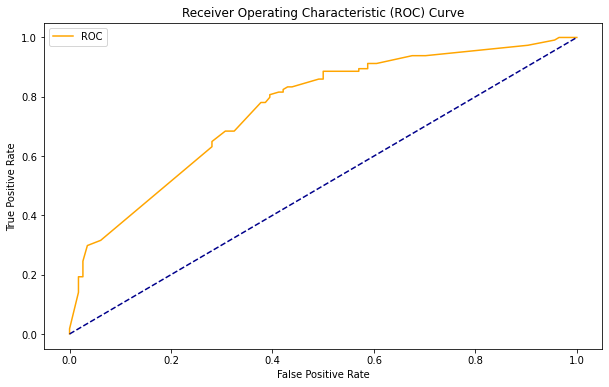

In [32]:
fig = plt.figure(figsize=(10,6))

# Predecir las probabilidades de la clase positiva usando el modelo de regresión logística entrenado
probs = modelGrdB.predict_proba(X_test)

# Tomar las probabilidades de la clase positiva solamente
probs = probs[:, 1]

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_test, probs*(1))

# Imprimir el valor del AUC
print('AUC: %.2f' % auc)

# Calcular la curva ROC usando los valores verdaderos y las probabilidades predichas
fpr, tpr, thresholds = roc_curve(y_test, probs*(1))

# Graficar la curva ROC
plot_roc_curve(fpr, tpr)


##Nota: es necesario que la variable de salida sea numérica, sino debe transformarse

### Guardar modelo

In [33]:
#Se guarda el modelo de Random Forest
joblib.dump(modelGrdB, './modelos/clasificacion/GBoost_CV.pkl')

['./modelos/clasificacion/GBoost_CV.pkl']

### Importancia de predictores

In [34]:
#Importancia por pureza de nodos

importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelGrdB.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
9,checking_account_status_none,0.4801
38,home_ownership_own,0.1588
21,savings_account_balance_< 100 DM,0.0727
0,loan_duration_mo,0.0623
44,foreign_worker_yes,0.0358
11,credit_history_current loans paid,0.0357
22,savings_account_balance_>= 1000 DM,0.0291
7,checking_account_status_< 0 DM,0.0273
27,time_employed_yrs_unemployed,0.0243
10,credit_history_critical account - other non-ba...,0.0201


Text(0.5, 1.0, 'Importancia de los predictores')

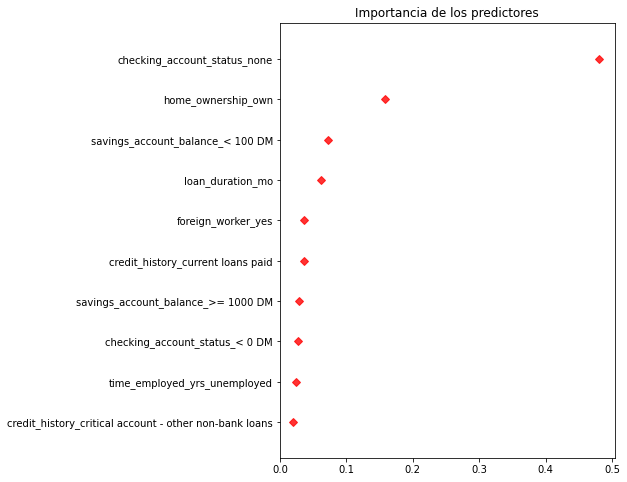

In [35]:
# Gráfico
fig, ax = plt.subplots(figsize=(6, 8))
df_importancia = importancia_predictores.nlargest(10, 'importancia').sort_values('importancia', ascending=True)

ax.barh(
    df_importancia['predictor'],
    df_importancia['importancia'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importancia'],
    df_importancia['predictor'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores')

#### Referencias


- Gradient Boosting
    - https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html
    